In [ ]:
import networkx as nx
from rdkit import Chem
from rdkit.Chem import rdmolfiles
from rdkit.Chem import rdmolops
import torch
from torch_geometric.datasets import QM9

import matplotlib.pyplot as plt

# Load the QM9 dataset
def load_qm9_dataset(file_path):
    suppl = rdmolfiles.SDMolSupplier(file_path)
    return [mol for mol in suppl if mol is not None]
    # Download and load the QM9 dataset from PyTorch Geometric
    def load_qm9_pyg_dataset():
        dataset = QM9(root='data/QM9')
        return dataset

    # Load the dataset
    qm9_pyg_dataset = load_qm9_pyg_dataset()
# Convert RDKit molecule to NetworkX graph
def mol_to_nx(mol):
    G = nx.Graph()
    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), element=atom.GetSymbol())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), order=bond.GetBondType())
    return G

# Load the dataset
qm9_molecules = load_qm9_dataset('path_to_your_qm9_dataset.sdf')

# Convert molecules to graphs and count edges
edge_counts = [mol_to_nx(mol).number_of_edges() for mol in qm9_molecules]

# Plot the edge range
plt.hist(edge_counts, bins=range(min(edge_counts), max(edge_counts) + 1), edgecolor='black')
plt.xlabel('Number of Edges')
plt.ylabel('Frequency')
plt.title('Edge Range in QM9 Dataset')
plt.show()

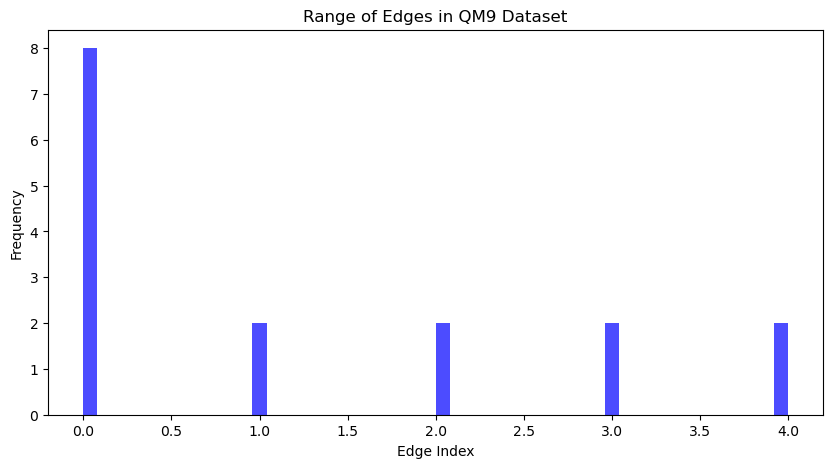

Range of edges: (0, 4)


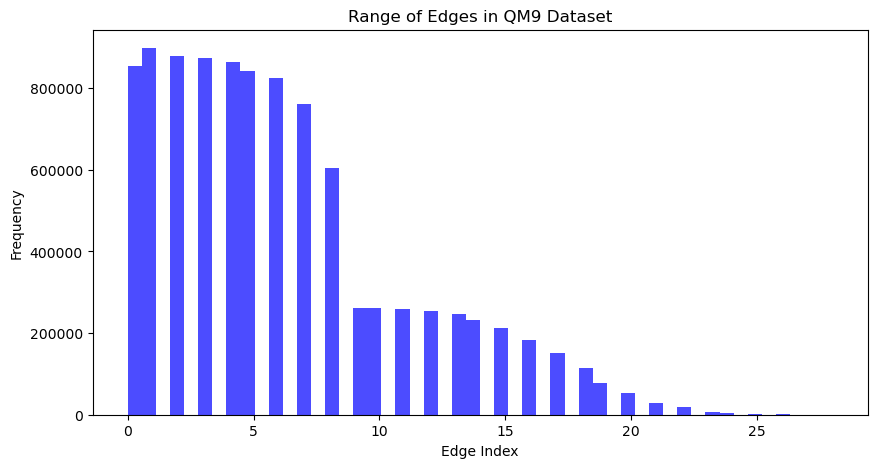

Range of edges: (0, 28)


In [3]:
import torch_geometric

# Extract the edge indices from the first graph in the dataset
edge_index = dataset[0].edge_index

# Calculate the range of the edges
edge_range = (edge_index.min().item(), edge_index.max().item())

# Plot the range of the edges
plt.figure(figsize=(10, 5))
plt.hist(edge_index.numpy().flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Range of Edges in QM9 Dataset')
plt.xlabel('Edge Index')
plt.ylabel('Frequency')
plt.show()

print(f"Range of edges: {edge_range}")
# Extract the edge indices from all graphs in the dataset
all_edge_indices = torch.cat([data.edge_index for data in dataset], dim=1)

# Calculate the range of the edges
edge_range = (all_edge_indices.min().item(), all_edge_indices.max().item())

# Plot the range of the edges
plt.figure(figsize=(10, 5))
plt.hist(all_edge_indices.numpy().flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Range of Edges in QM9 Dataset')
plt.xlabel('Edge Index')
plt.ylabel('Frequency')
plt.show()

print(f"Range of edges: {edge_range}")

In [ ]:
# Calculate the degree of each node in the first graph
degrees = edge_index[0].bincount()

# Plot the degree distribution
plt.figure(figsize=(10, 5))
plt.hist(degrees.numpy(), bins=range(degrees.min().item(), degrees.max().item() + 1), color='green', alpha=0.7, edgecolor='black')
plt.title('Degree Distribution in the First Graph of QM9 Dataset')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

print(f"Degree distribution: {degrees}")

Minimum edges in a graph: 4
Maximum edges in a graph: 56
Average edges per graph: 37.33


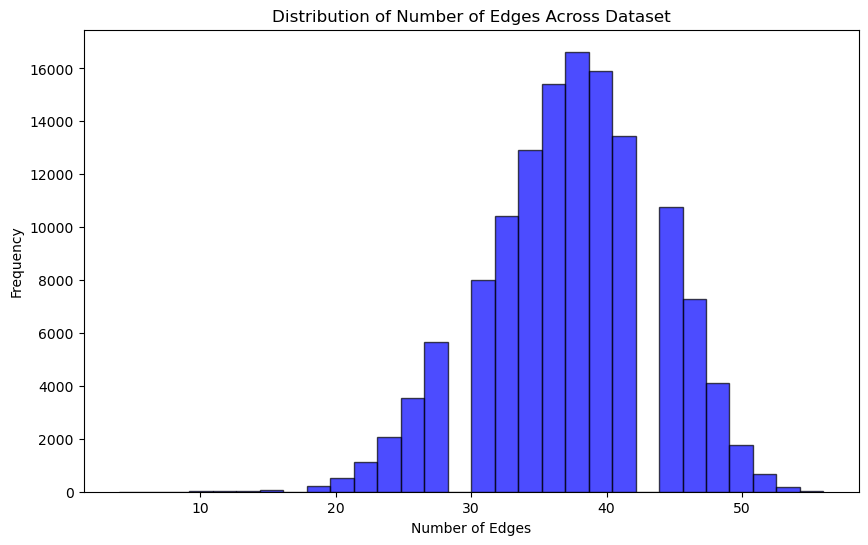

In [ ]:
# Get edge counts per graph
from torch_geometric.utils import to_dense_adj
import torch
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader as GeoDataLoader
import pickle

with open('/Users/nasibhuseynzade/Downloads/zinc_dataset.pkl','rb') as f:
   dataset = pickle.load(f)

train_loader = GeoDataLoader(dataset, shuffle=False)
    

def analyze_edge_distribution(data_loader):
    edge_counts = []
    
    # Collect edge counts for each graph
    for data in data_loader:
        num_edges = data.edge_index.shape[1]
        edge_counts.append(num_edges)
    
    edge_counts = torch.tensor(edge_counts)
    
    # Plot distribution
    plt.figure(figsize=(10, 6))
    plt.hist(edge_counts, bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Number of Edges Across Dataset')
    plt.xlabel('Number of Edges')
    plt.ylabel('Frequency')
    
    # Print statistics
    print(f"Minimum edges in a graph: {edge_counts.min().item()}")
    print(f"Maximum edges in a graph: {edge_counts.max().item()}")
    print(f"Average edges per graph: {edge_counts.float().mean().item():.2f}")
    
    plt.show()
    
# Assuming your dataloader is called 'train_loader'
analyze_edge_distribution(train_loader)

Minimum edges in a graph: 10
Maximum edges in a graph: 88
Average edges per graph: 49.81


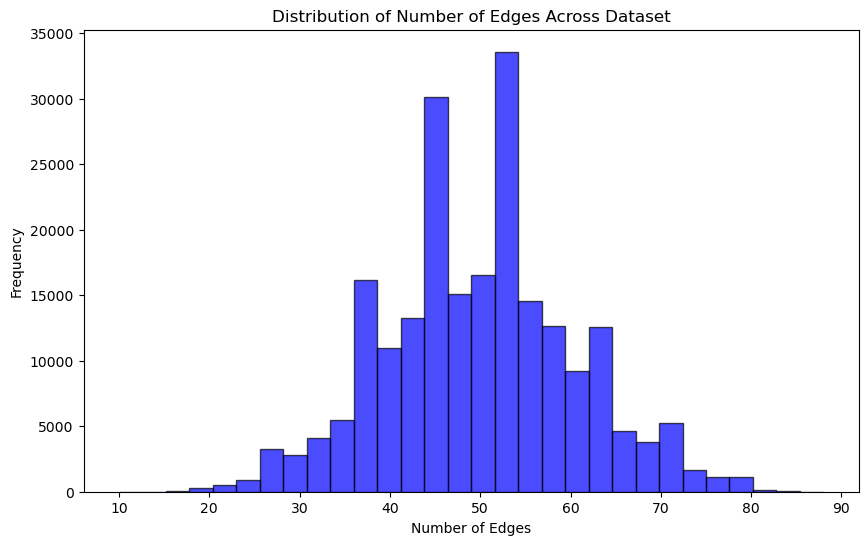

In [5]:
# Get edge counts per graph
from torch_geometric.utils import to_dense_adj
import torch
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader as GeoDataLoader
import pickle

with open('/Users/nasibhuseynzade/Downloads/zinc_dataset.pkl','rb') as f:
   dataset = pickle.load(f)

train_loader = GeoDataLoader(dataset, shuffle=False)
    

def analyze_edge_distribution(data_loader):
    edge_counts = []
    
    # Collect edge counts for each graph
    for data in data_loader:
        num_edges = data.edge_index.shape[1]
        edge_counts.append(num_edges)
    
    edge_counts = torch.tensor(edge_counts)
    
    # Plot distribution
    plt.figure(figsize=(10, 6))
    plt.hist(edge_counts, bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Number of Edges Across Dataset')
    plt.xlabel('Number of Edges')
    plt.ylabel('Frequency')
    
    # Print statistics
    print(f"Minimum edges in a graph: {edge_counts.min().item()}")
    print(f"Maximum edges in a graph: {edge_counts.max().item()}")
    print(f"Average edges per graph: {edge_counts.float().mean().item():.2f}")
    
    plt.show()
    
# Assuming your dataloader is called 'train_loader'
analyze_edge_distribution(train_loader)

Minimum nodes in a graph: 6
Maximum nodes in a graph: 38
Average nodes per graph: 23.15


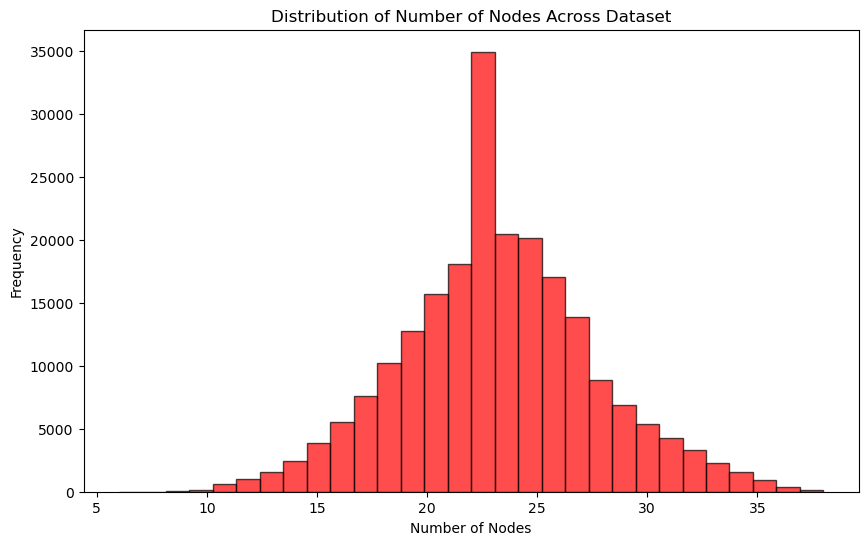

In [6]:
def analyze_node_distribution(data_loader):
    node_counts = []
    
    # Collect number of nodes for each graph
    for data in data_loader:
        num_nodes = data.x.shape[0]  # Get number of nodes from feature matrix
        node_counts.append(num_nodes)
    
    node_counts = torch.tensor(node_counts)
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    plt.hist(node_counts, bins=30, color='red', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Number of Nodes Across Dataset')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Frequency')
    
    # Print statistics
    print(f"Minimum nodes in a graph: {node_counts.min().item()}")
    print(f"Maximum nodes in a graph: {node_counts.max().item()}")
    print(f"Average nodes per graph: {node_counts.float().mean().item():.2f}")
    
    plt.show()

# Run analysis
analyze_node_distribution(train_loader)

In [7]:
with open('/Users/nasibhuseynzade/Downloads/qm9_dataset.pkl','rb') as f:
   dataset = pickle.load(f)

train_loader = GeoDataLoader(dataset, shuffle=False)

Minimum nodes in a graph: 3
Maximum nodes in a graph: 29
Average nodes per graph: 18.03


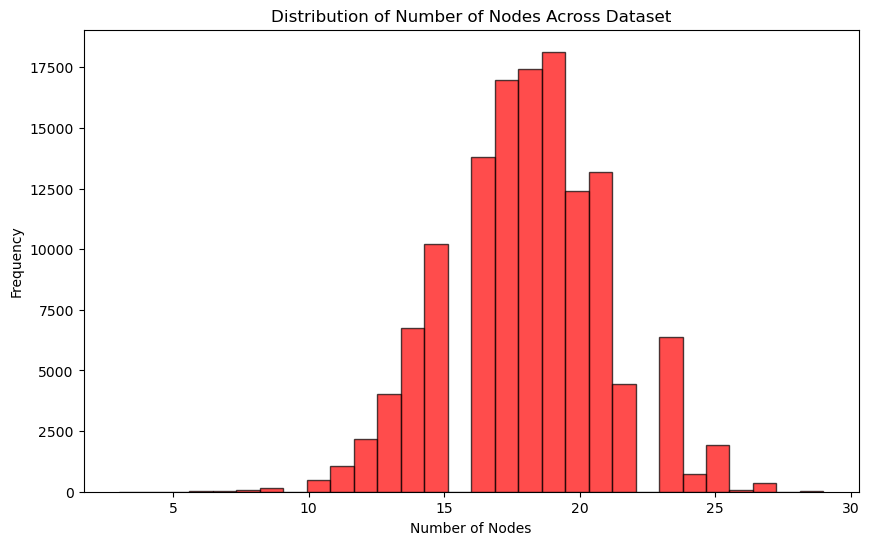

In [8]:
def analyze_node_distribution(data_loader):
    node_counts = []
    
    # Collect number of nodes for each graph
    for data in data_loader:
        num_nodes = data.x.shape[0]  # Get number of nodes from feature matrix
        node_counts.append(num_nodes)
    
    node_counts = torch.tensor(node_counts)
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    plt.hist(node_counts, bins=30, color='red', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Number of Nodes Across Dataset')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Frequency')
    
    # Print statistics
    print(f"Minimum nodes in a graph: {node_counts.min().item()}")
    print(f"Maximum nodes in a graph: {node_counts.max().item()}")
    print(f"Average nodes per graph: {node_counts.float().mean().item():.2f}")
    
    plt.show()

# Run analysis
analyze_node_distribution(train_loader)